In [2]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = '/Users/yaolun/research/PREMISE_ERS/photospheric_lines/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits'
wavefile = '/Users/yaolun/research/PREMISE_ERS/photospheric_lines/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits'

data = fits.open(filename)
wavesol = fits.open(wavefile)

In [17]:
data[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =              1569128                                                  
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '                                                            
WAVE    = '../../WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' / Wavelength array      
PHXTEFF =               4000.0 / [K] effective temperature                      
PHXLOGG =                  4.0 / [cm/s^2] log (surface gravity)                 
PHXM_H  =                  0.0 / [M/H] metallicity (rel. sol. - Asplund &a 2009)
PHXALPHA=                  0.0 / [a/M] alpha element enhancement                
PHXDUST =                    F / Dust in atmosphere                             
PHXEOS  = 'ACES    '        

In [5]:
wavesol[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =              1569128                                                  
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '                                                            
UNIT    = 'Angstrom'                                                            
COMMENT Wavelength array for PHOENIX grid 'PHOENIX-ACES-AGSS-COND-2011'         

In [18]:
min(wavesol[0].data), max(wavesol[0].data)

(500.0, 54999.75)

(0.5, 0.7)

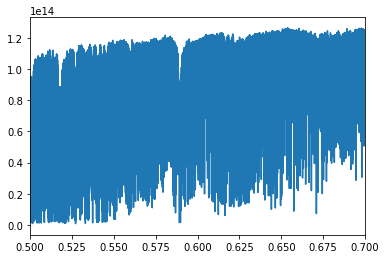

In [6]:
plt.plot(wavesol[0].data/1e4, data[0].data)
plt.xlim([0.5,0.7])

## Convolve with a Gaussian Kernel

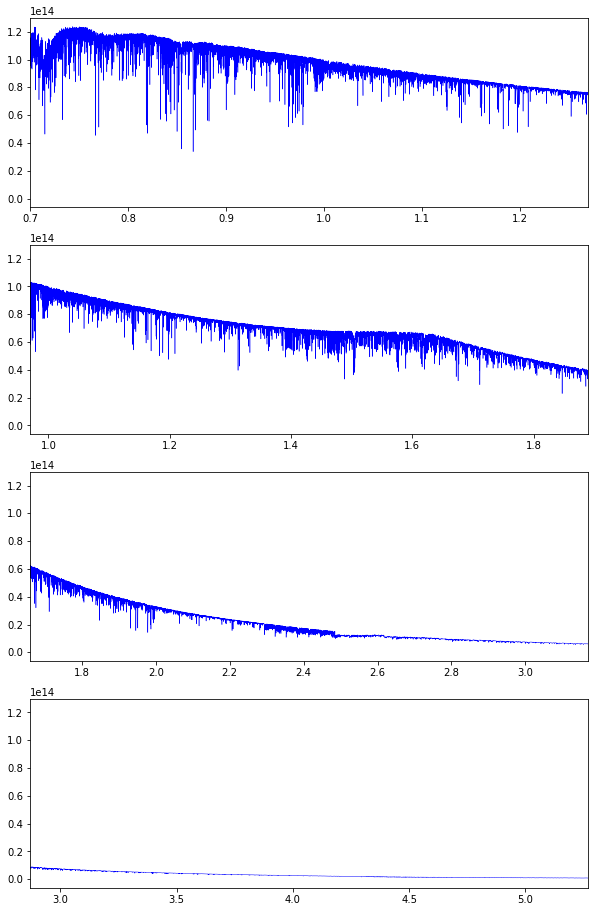

In [16]:
from astropy.convolution import convolve, Gaussian1DKernel

# choose the Gaussian kernel that matches the NIRSpec spectral resolution
# NIRSpec: R ~ 2700
R = 2700
stddev = 2/2700*1e4*2.354
gauss = Gaussian1DKernel(stddev=stddev)

cov_data = convolve(data[0].data, gauss, boundary='extend')

# BB radiation; B_lambda
from astropy.analytic_functions import blackbody_lambda
temp = 100
# unit: erg s−1 cm−2 A−1 sr−1
flux_bb = blackbody_lambda(wavesol[0].data, temp)

nirspec_bands = [[0.7, 1.27],
                 [0.97, 1.89],
                 [1.66, 3.17],
                 [2.87, 5.27]]

fig = plt.figure(figsize=(10,16))
for i, band in enumerate(nirspec_bands):
    ax = fig.add_subplot(4,1,i+1)
    ax.plot(wavesol[0].data/1e4, cov_data, 'b', linewidth=0.5)
    ax.set_xlim(band)